In [1]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/InfoVis
!ls # special shell command to view the files in the home directory of the notebook environment

Mounted at /content/gdrive
/content/gdrive/MyDrive/InfoVis
 abbi-taylor-vis.ipynb	   spotify_taylorswift.csv    t.csv
'InfoVis Mod 1.gdoc'	   survey.csv		     'write up mod 3.gdoc'
 Mod2Assignment.ipynb	   surveyexploring.ipynb
 netflix_daily_top10.csv  'taylor swift songs.gdoc'


In [2]:
import pandas as pd
import altair as alt


file = "survey.csv"
df = pd.read_csv(file)
df

,Timestamp,What's your age?,What is your school year?,"Do you consider Taylor Swift to be your ""favorite artist""?",Do you think Taylor Swift is more successful than other musical artists?,Choose one word to describe Taylor's music,Do you think Taylor Swift only writes break up songs about her exes?,Do you think Taylor's music is emotionally deep and profound?,"On a scale of 1 to 10, rank Swift's song ""Cold As You"" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here","On a scale of 1 to 10, rank Swift's song ""White Horse"" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here\n","On a scale of 1 to 10, rank Swift's song ""Dear John"" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here\n","On a scale of 1 to 10, rank Swift's song ""I Knew You Were Trouble."" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here\n","On a scale of 1 to 10, rank Swift's song ""All You Had To Do Was Stay"" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here\n","On a scale of 1 to 10, rank Swift's song ""Delicate"" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here","On a scale of 1 to 10, rank Swift's song ""The Archer"" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here","On a scale of 1 to 10, rank Swift's song ""My Tears Ricochet"" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here","On a scale of 1 to 10, rank Swift's song ""tolerate it"" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here","On a scale of 1 to 10, rank Swift's song ""White Horse (Taylor's Version)"" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here","On a scale of 1 to 10, rank Swift's song ""I Knew You Were Trouble (Taylor's Version)"" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here","On a scale of 1 to 10, rank Swift's song ""You're On Your Own, Kid"" in terms of how much you like it. \n\n1 is that you don't like it at all and 10 is that you liked it a lot.\n\nIf you haven't heard this song, you can listen to it here"
0,2023/04/09 3:24:54 PM AST,21,College Junior,Yes,NaN,deep,No,Yes,6,5,8,9,6,9,8,7,6,5,9,9
1,2023/04/12 3:01:26 PM AST,21,College Junior,No,Yes,Awesome,No,Yes,5,5,6,7,9,8,8,8,6,6,7,7
2,2023/04/12 3:03:29 PM AST,20,College Sophomore,No,Yes,Ethereal,No,Yes,4,7,3,4,7,9,5,5,4,8,6,7
3,2023/04/12 3:10:05 PM AST,18,College Freshman,No,Yes,Overrated,Yes,No,4,5,6,7,6,3,3,3,4,2,5,5
4,2023/04/12 3:10:55 PM AST,20,College Junior,No,Yes,thought-provoking,No,Yes,5,10,8,9,9,7,5,6,10,10,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2023/04/20 1:58:12 PM AST,20,College Sophomore,Yes,Yes,Art,No,Yes,6,10,9,5,7,7,7,8,8,10,4,10
104,2023/04/20 2:05:07 PM AST,21,College Senior,Yes,Yes,inventive,No,Yes,5,6,9,7,8,10,3,10,9,6,7,10
105,2023/04/20 2:32:19 PM AST,21,College S

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

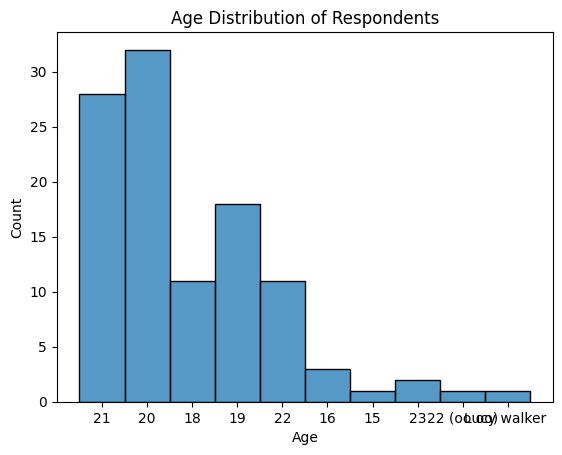

In [7]:
# sns.histplot(data=df, x="What's your age?")
# plt.xlabel("Age")
# plt.ylabel("Count")
# plt.title("Age Distribution of Respondents")
# plt.show()
sns.histplot(data=df, x="What's your age?", binwidth=1, discrete=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Respondents")
plt.xticks(df["What's your age?"].sort_values().unique())
plt.show()


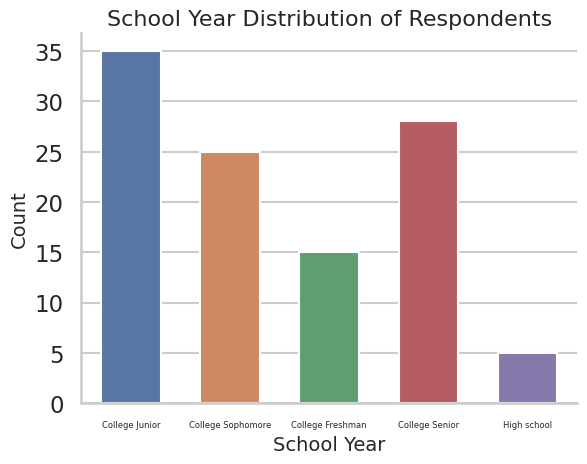

In [32]:
sns.set(style="whitegrid")
sns.set_context("talk")
sns.countplot(data=df, x="What is your school year?", width=0.6)
plt.xlabel("School Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("School Year Distribution of Respondents", fontsize=16)
sns.despine(top=True, right=True)
plt.xticks(fontsize=6) # set font size of x-axis tick labels
plt.show()




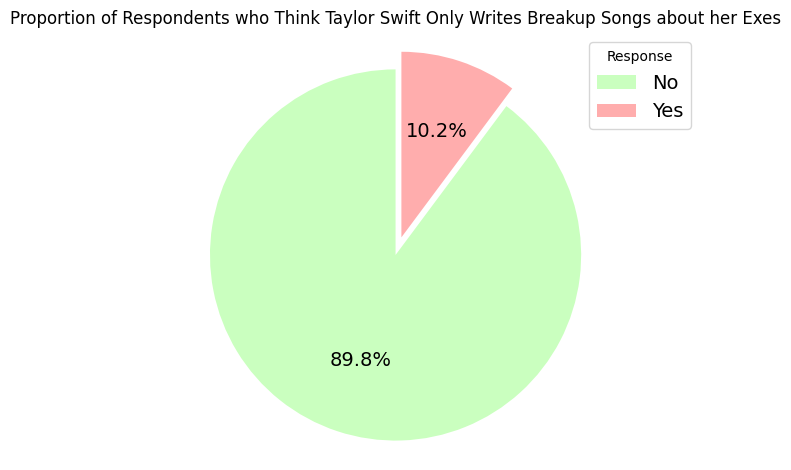

In [18]:
labels = ["No", "Yes"]
sizes = df["Do you think Taylor Swift only writes break up songs about her exes?"].value_counts().values

#set color palette for pie chart
colors = ['#CAFFBF', '#FFADAD'] # flipped color order


#set explode values to highlight "Yes" response
explode = (0, 0.1)

#plot pie chart
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})


#add title and legend
plt.title("Proportion of Respondents who Think Taylor Swift Only Writes Breakup Songs about her Exes")
plt.legend(title="Response", loc="upper right", labels=labels, fontsize=14)


#remove chart outline and display chart
plt.axis('equal')
plt.tight_layout()
plt.show()


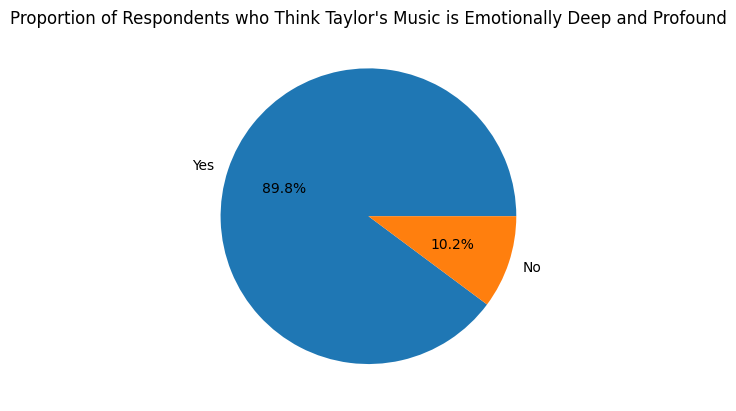

In [23]:
labels = ["Yes", "No"]
sizes = df["Do you think Taylor's music is emotionally deep and profound?"].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of Respondents who Think Taylor's Music is Emotionally Deep and Profound")
plt.show()



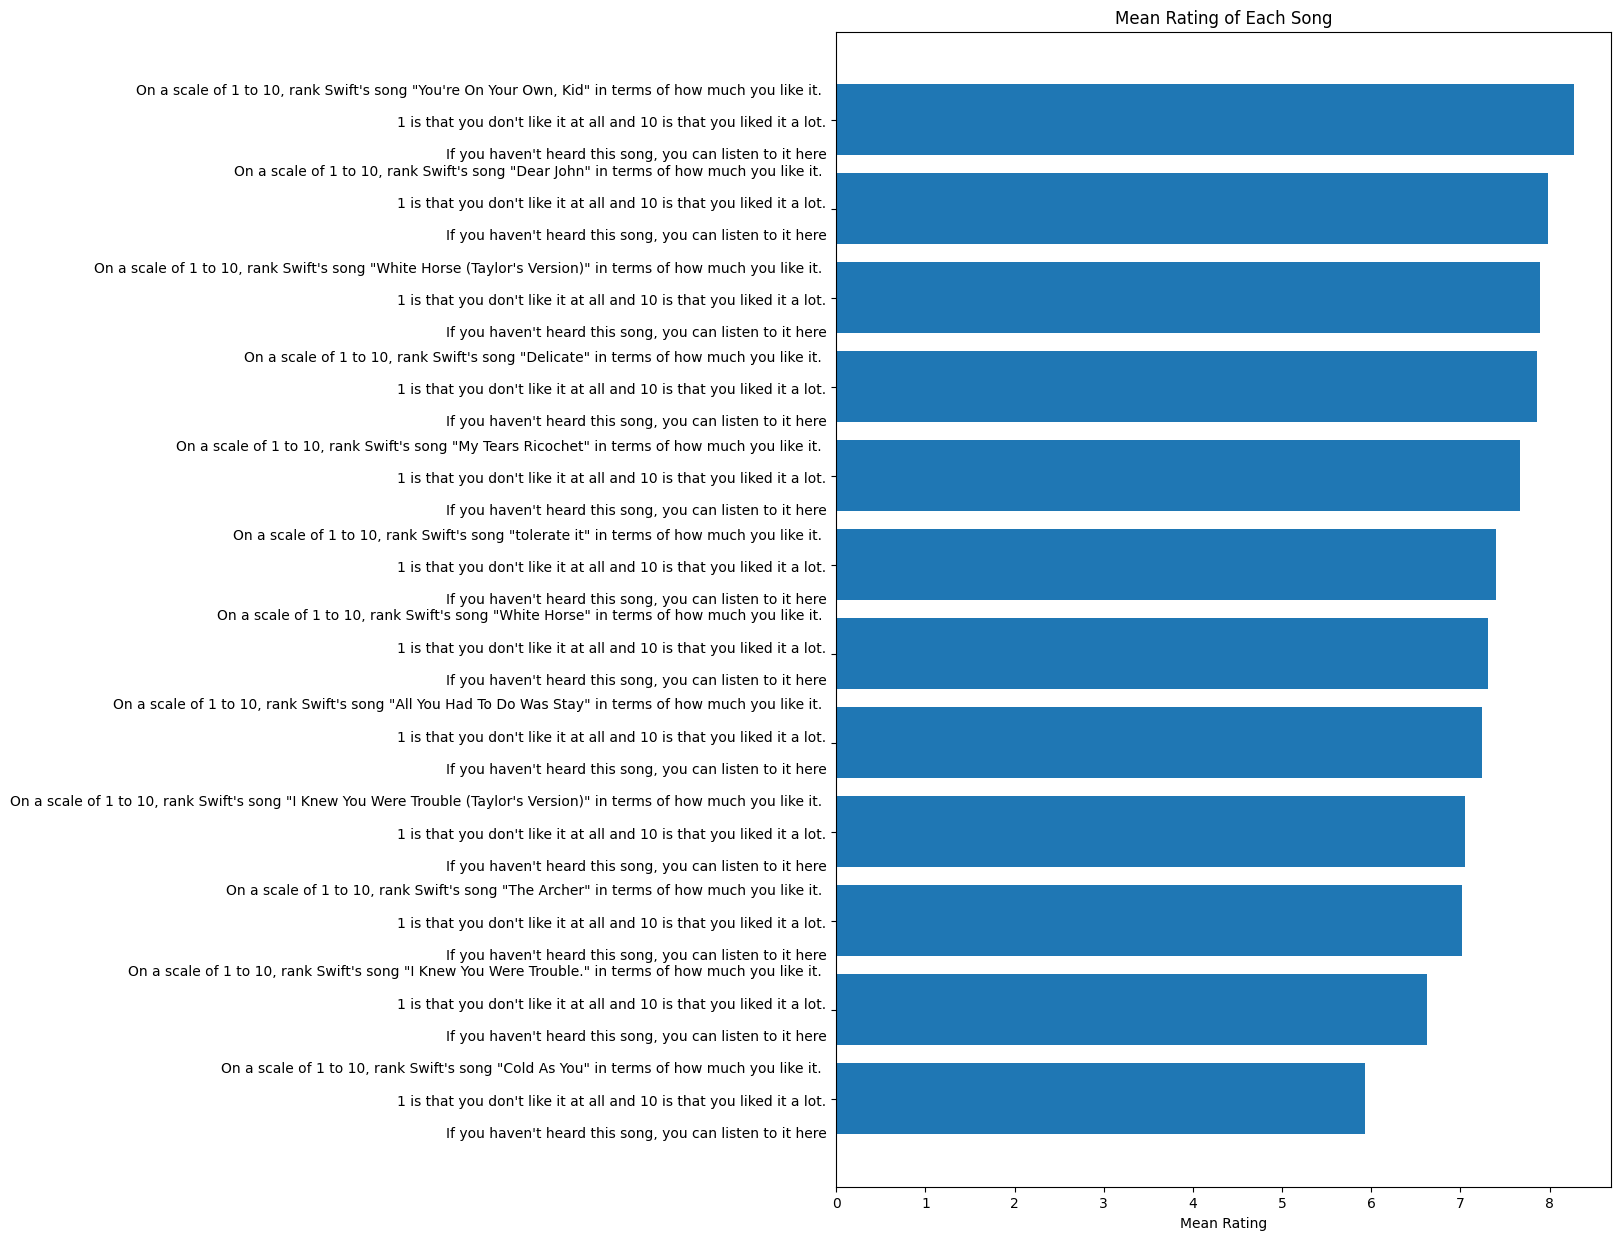

In [20]:
df_ratings = df.iloc[:, 8:]
mean_ratings = df_ratings.mean().sort_values()

plt.figure(figsize=(10, 15))  # Adjust the figure size here
plt.barh(mean_ratings.index, mean_ratings.values)
plt.xlabel("Mean Rating")
plt.title("Mean Rating of Each Song")
plt.show()


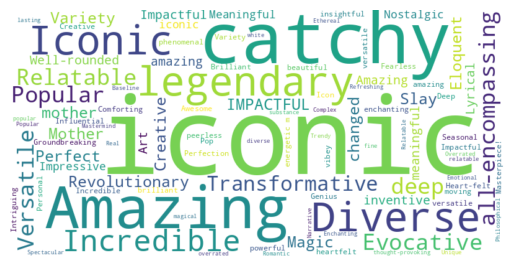

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the counts of each word choice
word_counts = df["Choose one word to describe Taylor's music"].value_counts()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
